In [18]:
import librosa
import numpy as np
from IPython.display import Audio
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = 'C:/Users/blaze/Desktop/sample back-up/the vault/20130714_Native Boys - Cherrlyn 78 rpm!.mp3'

In [10]:
x, fs = librosa.load(file_path, sr = None)
Audio(x*0.5, rate = fs)
len(x)

8592127

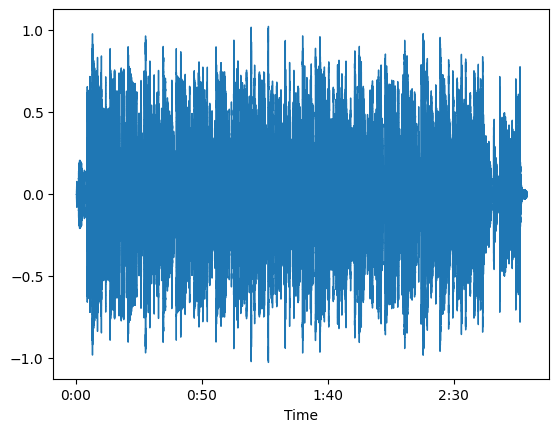

In [6]:
librosa.display.waveshow(y=x, sr = fs)

C:\Users\blaze\AppData\Local\Temp\ipykernel_8296\4259813099.py:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Xmag = librosa.amplitude_to_db(X)


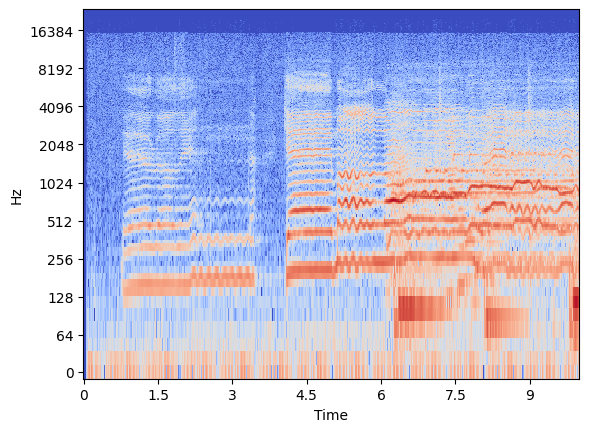

In [12]:
X = librosa.stft(x[:480000])
Xmag = librosa.amplitude_to_db(X)
librosa.display.specshow(Xmag, sr=fs,x_axis = 'time', y_axis='log')

In [ ]:
#10 seconds
x = x[:480000]

In [15]:
onset_frames = librosa.onset.onset_detect(y=x,sr=fs)
print(onset_frames)

[  7  31  49  64  75 142 173 186 202 220 232 241 314 317 332 371 381 385
 397 458 481 494 514 528 546 570 667 674 731 765 843 921 931]


In [16]:
onset_times = librosa.frames_to_time(onset_frames,sr=fs)
print(onset_times)

[0.07466667 0.33066667 0.52266667 0.68266667 0.8        1.51466667
 1.84533333 1.984      2.15466667 2.34666667 2.47466667 2.57066667
 3.34933333 3.38133333 3.54133333 3.95733333 4.064      4.10666667
 4.23466667 4.88533333 5.13066667 5.26933333 5.48266667 5.632
 5.824      6.08       7.11466667 7.18933333 7.79733333 8.16
 8.992      9.824      9.93066667]


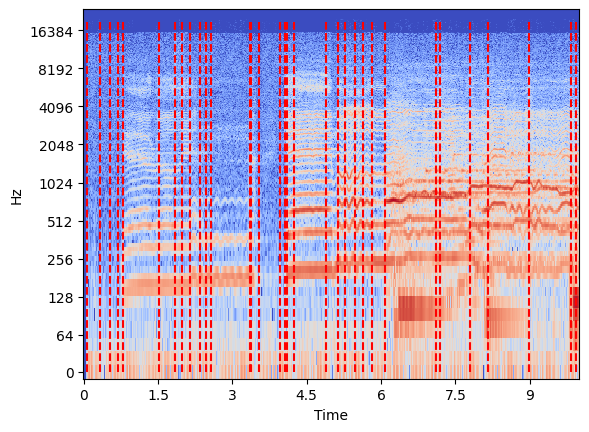

In [27]:
librosa.display.specshow(Xmag, sr=fs,x_axis = 'time', y_axis='log')
plt.vlines(onset_times,ymin=0,ymax =20000, linestyles='--', colors='red')
plt.show()

In [33]:
clicks  = librosa.clicks(times = onset_times,length=len(x), sr = fs)
Audio(x+clicks,rate=fs)